In [ ]:
## import the important liberaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
## import the dataset

In [7]:
df=pd.read_csv('cardekho_dataset.csv')

In [9]:
df.head(5)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [11]:
df.shape

(15411, 14)

In [ ]:
## EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [15]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [44]:
categorical_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [46]:
numerical_cols

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [48]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

In [50]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [52]:
df.describe(include= 'object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [54]:
df['car_name'].unique()

array(['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport',
       'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift',
       'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz',
       'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno',
       'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta',
       'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID',
       'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500',
       'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO',
       'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo',
       'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos',
       'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V',
       'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4',
       'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar',
       'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6',
       'Mercedes-Benz E-Class', 'Audi Q7'

In [56]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [60]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [74]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [70]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [72]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [123]:
df.brand.value_counts()[0:10]

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

In [ ]:
## Visualization


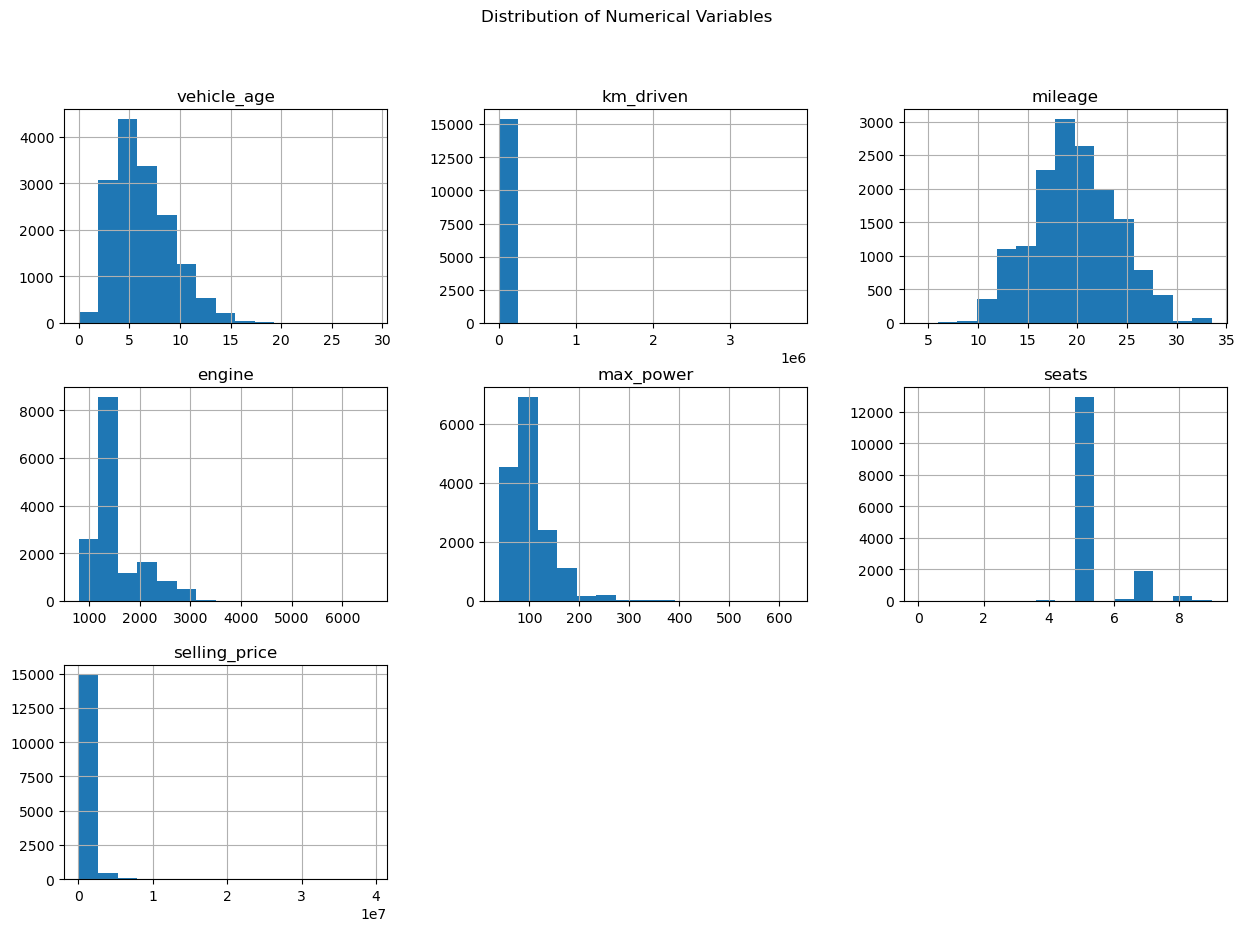

In [93]:
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

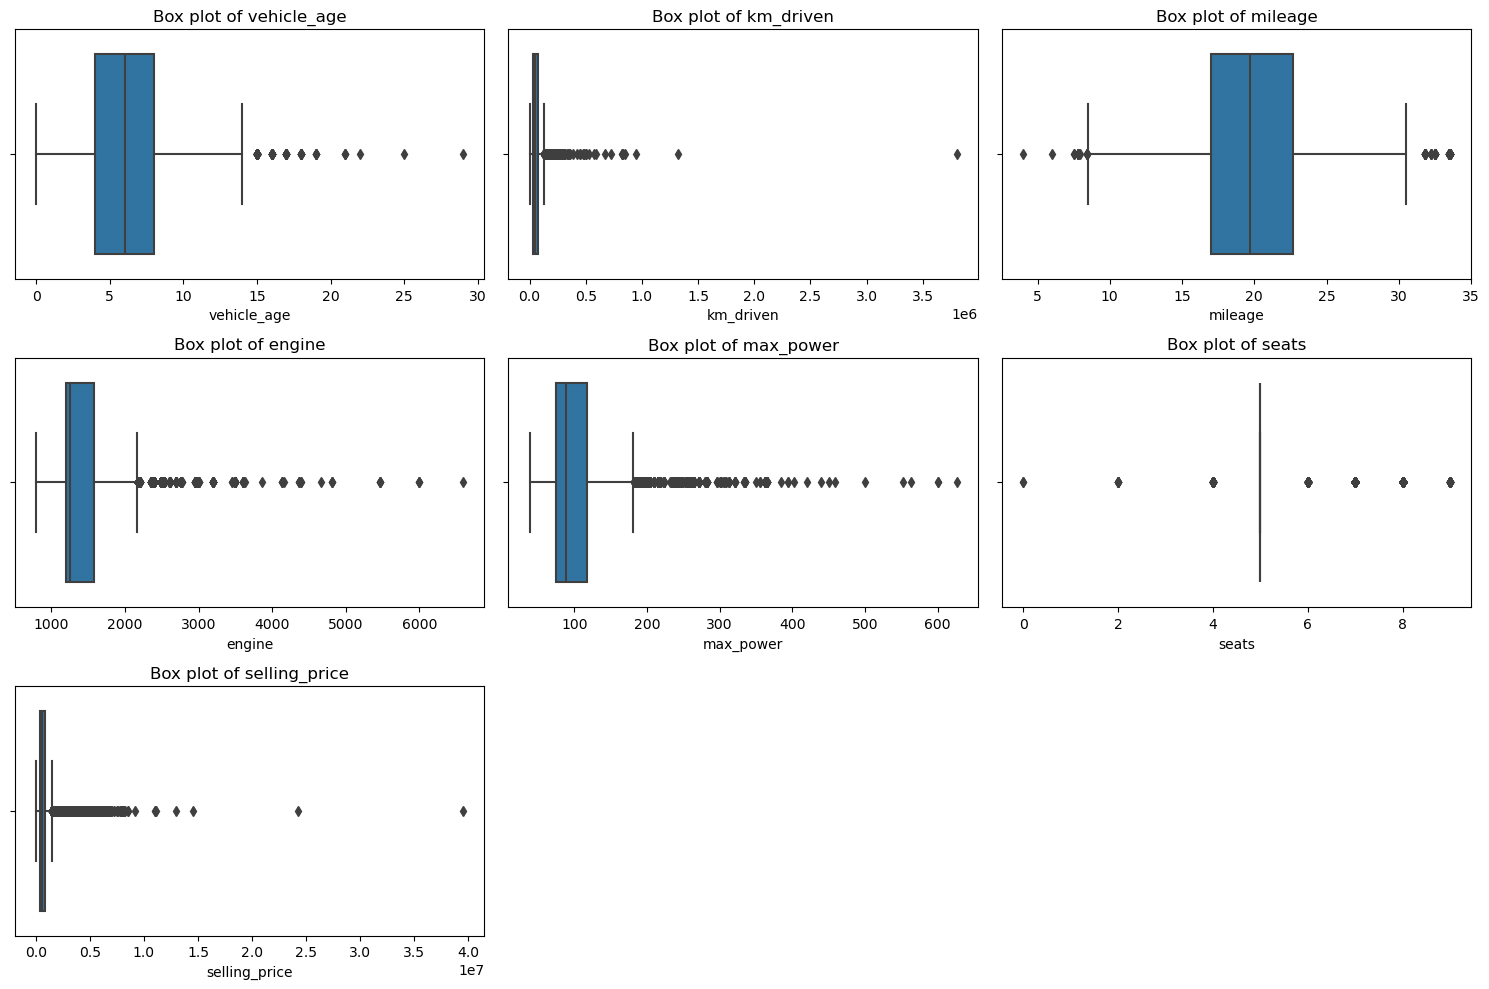

In [95]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

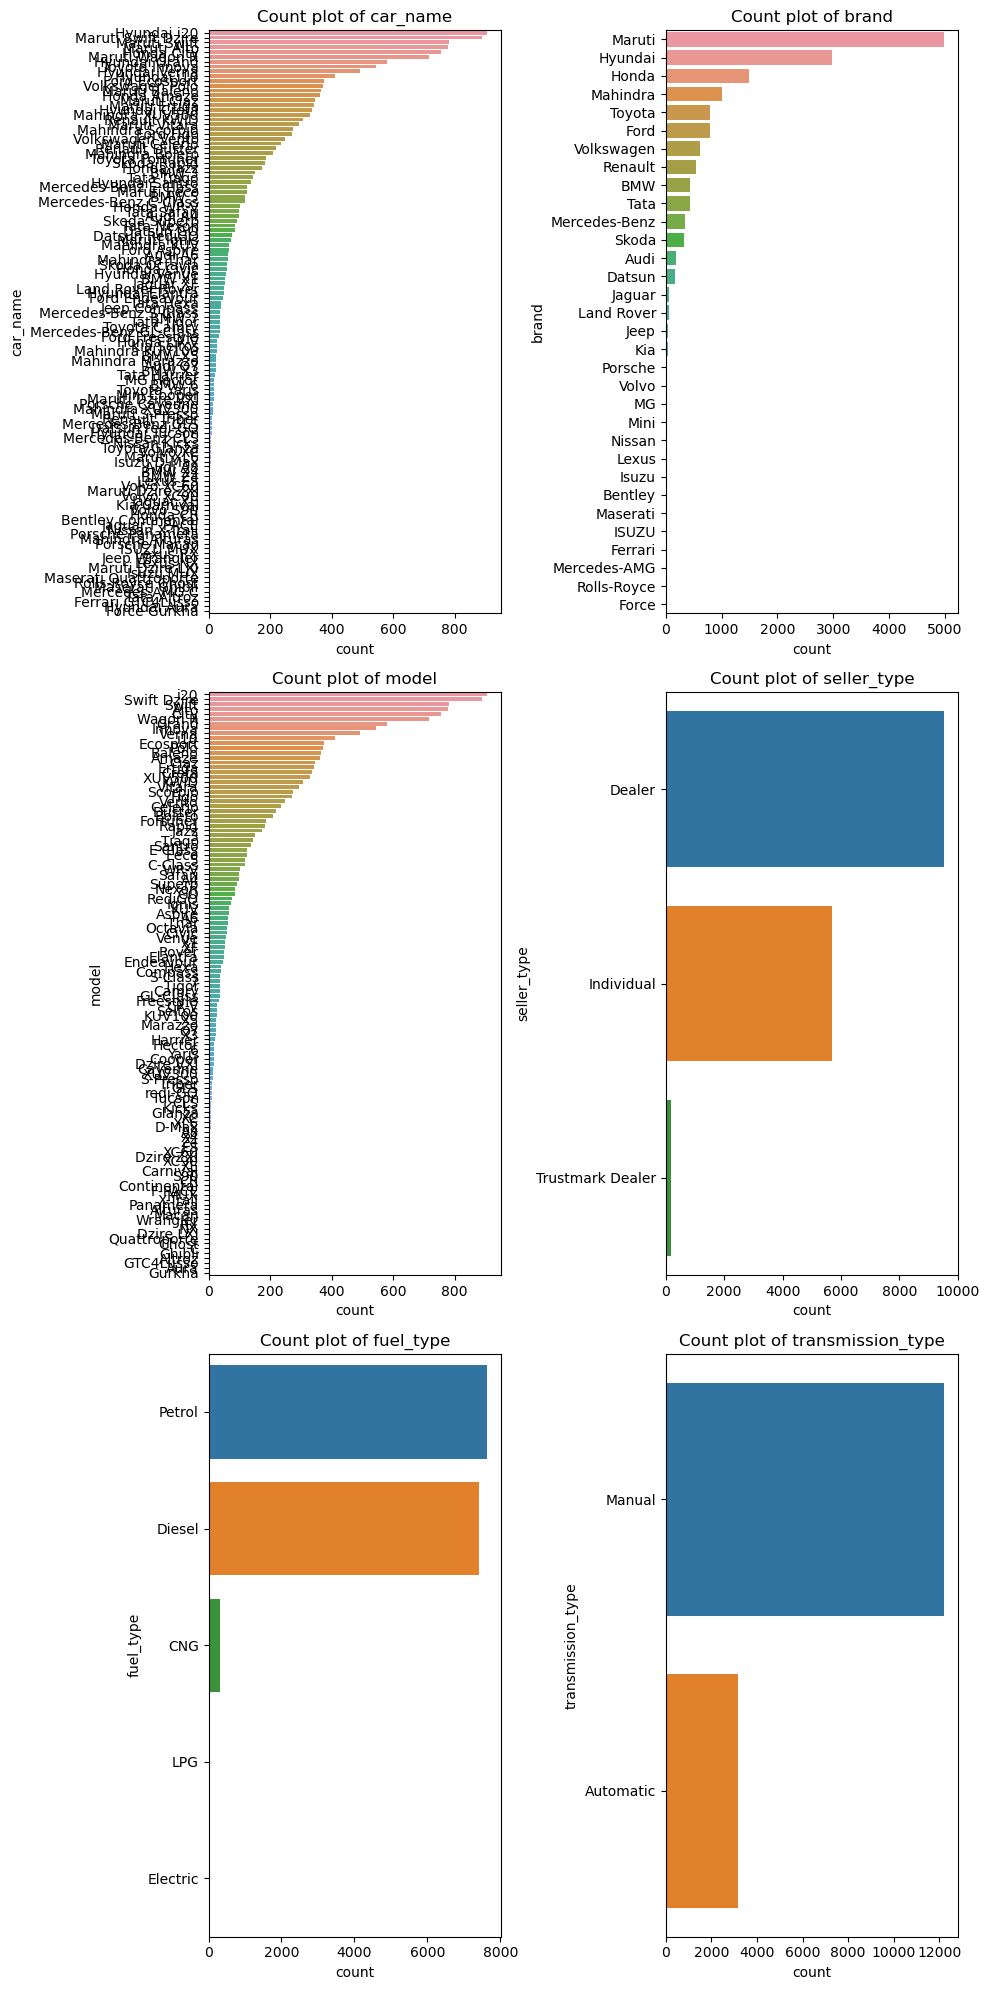

In [103]:
categorical_cols = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(10,20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

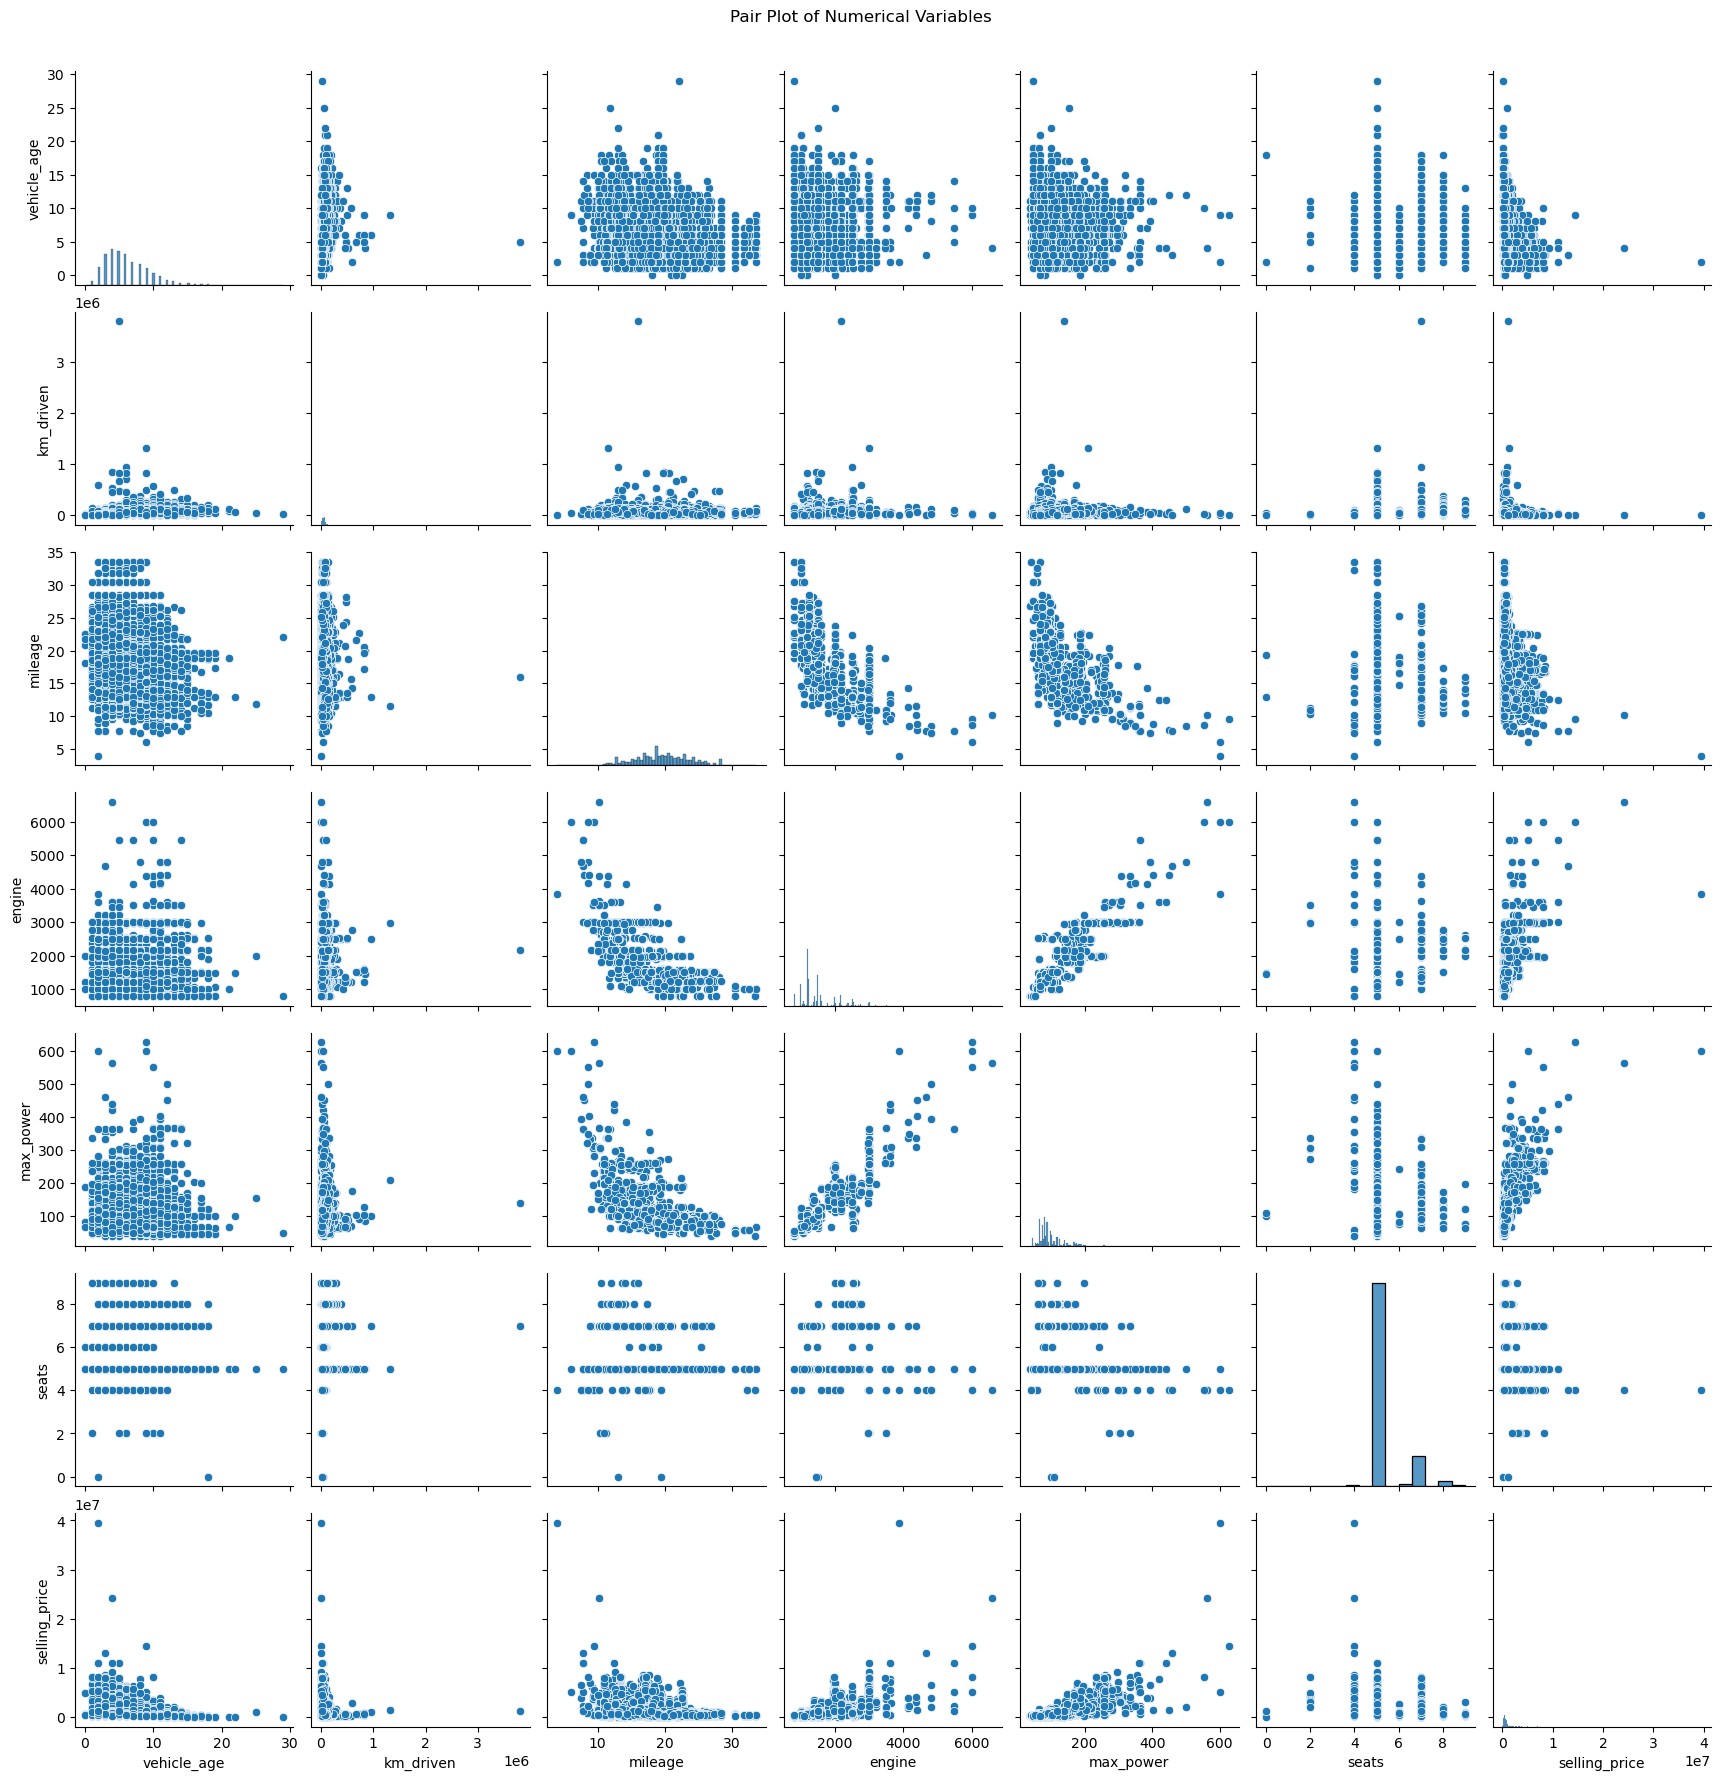

In [104]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

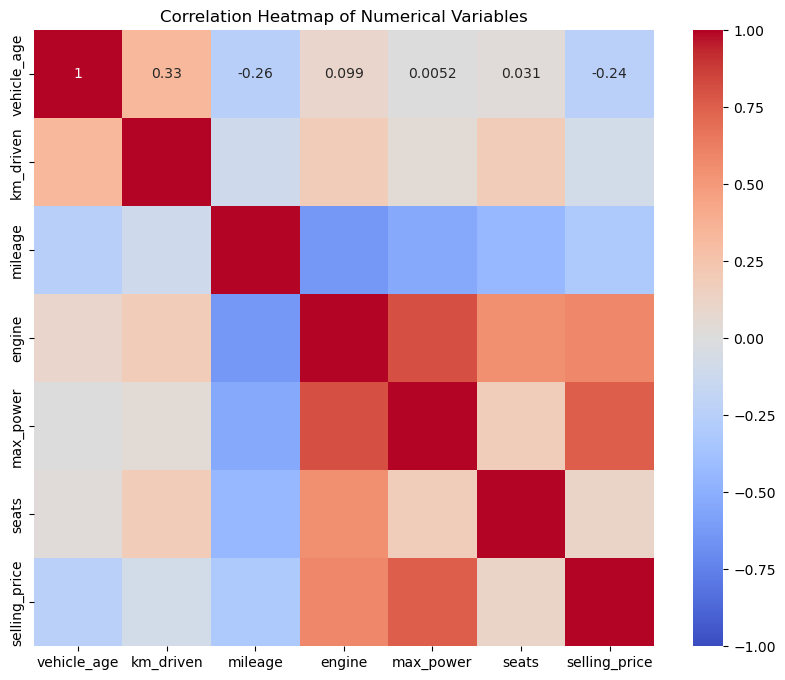

In [105]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Summary

1. Data Overview
Shape and Structure: The dataset consists of 15,411 entries and 14 columns, comprising both numerical and categorical variables.
Column Details:
Numerical Columns: vehicle_age, km_driven, mileage, engine, max_power, seats, selling_price
Categorical Columns: car_name, brand, model, seller_type, fuel_type, transmission_type

2. Distribution of Numerical Variables
Histograms:
Most numerical variables have a right-skewed distribution.
The vehicle_age and km_driven columns show a high concentration of values in the lower ranges, indicating most vehicles are relatively new and have not been driven much.

3. Box Plot Analysis
Box Plots:
Highlight the presence of outliers in variables like km_driven and selling_price.
The mileage and max_power variables show a wide range of values with some extreme outliers.

4. Categorical Variables Distribution
Count Plots:
seller_type shows a significant number of 'Dealer' entries compared to 'Individual'.
fuel_type and transmission_type distributions indicate a higher frequency of 'Diesel' and 'Manual' vehicles, respectively.

5. Pair Plot Analysis
Pair Plots:
Visual inspection suggests some relationships between variables like engine and max_power, and vehicle_age and selling_price.
Correlation between selling_price and other variables indicates potential predictive features.


6. Correlation Heatmap
Heatmap:
High correlation observed between engine and max_power.
selling_price shows moderate correlation with engine, max_power, and vehicle_age, suggesting these variables could be important predictors for a pricing model.

## Conclusion
This initial data exploration provides valuable insights into the structure and distribution of the dataset. Understanding these patterns and relationships is crucial for preprocessing, feature engineering, and building effective predictive models. Further steps could involve handling outliers, scaling numerical variables, encoding categorical variables, and splitting the data for training and testing machine learning models.